# Proyecto Bibliométrico

A continuación se importan los paquetes requeridos y la muestra bibliométrica de 100 artículos. Guaramos estos datos en un datafram de pandas llamado _muestra_.

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Settings for the plots
font = {'family': 'dosis',
        'weight': 'normal',
        'size': 14,
        }

sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=16)     # fontsize of the x and y labels
plt.rc('axes', linewidth=1.65 )   # width of the frame
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('font', size=14)          # controls default text sizes

MainColor1 = (0, 1, 1) 
BackColor1 = (0, .565, .573)
MainColor2 = (.498, 0, .698)
BackColor2 = (.282, 0, .40)
MainGray = (.549, .549, .549)
BackGray = (.4, .4, .4)


In [88]:
# Data Frames
muestra = pd.read_csv("Muestra.csv")
datos = pd.read_csv("FinalSearch.csv")

Las primeras entradas y las columnas del datafram se muestran a continuación

In [2]:
datos.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,Page count,Cited by,DOI,Link,EID
0,Shankar F.; Buchan S.; Rettura A.; Bouillot V....,"Shankar, Francesco (55888485900); Buchan, Stew...",55888485900; 56443848300; 8974845600; 55696384...,Avoiding progenitor bias: The structural and m...,2015,Astrophysical Journal,802,2.0,73,NaN,NaN,NaN,59,10.1088/0004-637X/802/2/73,https://www.scopus.com/inward/record.uri?eid=2...,2-s2.0-84926613751
1,Salumbides E.J.; Bagdonaite J.; Abgrall H.; Ro...,"Salumbides, E.J. (9640106900); Bagdonaite, J. ...",9640106900; 54895523700; 6602571948; 700403449...,H2 Lyman and Werner band lines and their sensi...,2015,Monthly Notices of the Royal Astronomical Society,450,2.0,NaN,1237.0,1245.0,8.0,9,10.1093/mnras/stv656,https://www.scopus.com/inward/record.uri?eid=2...,2-s2.0-84938099096
2,Coppejans R.; Cseh D.; Williams W.L.; van Velz...,"Coppejans, Rocco (55496132600); Cseh, David (3...",55496132600; 36628189900; 55532159100; 3703545...,Megahertz peaked-spectrum sources in the Boöte...,2015,Monthly Notices of the Royal Astronomical Society,450,2.0,NaN,1477.0,1485.0,8.0,38,10.1093/mnras/stv681,https://www.scopus.com/inward/record.uri?eid=2...,2-s2.0-84938099094
3,Singh S.; Mandelbaum R.; More S.,"Singh, Sukhdeep (57218165729); Mandelbaum, Rac...",57218165729; 7004175711; 16234186800,Intrinsic alignments of SDSS-III BOSS LOWZ sam...,2015,Monthly Notices of the Royal Astronomical Society,450,2.0,NaN,2195.0,2216.0,21.0,132,10.1093/mnras/stv778,https://www.scopus.com/inward/record.uri?eid=2...,2-s2.0-84938124813
4,Vincent A.C.; Martínez E.F.; Hernández P.; Men...,"Vincent, Aaron C. (24463837900); Martínez, Enr...",24463837900; 55601072500; 7202206895; 66022572...,Revisiting cosmological bounds on sterile neut...,2015,Journal of Cosmology and Astroparticle Physics,2015,4.0,006,NaN,NaN,NaN,49,10.1088/1475-7516/2015/04/006,https://www.scopus.com/inward/record.uri?eid=2...,2-s2.0-84928009373


In [3]:
datos.columns

Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'Cited by', 'DOI', 'Link', 'EID'],
      dtype='object')

In [30]:
datos.shape

(31, 16)

## Análisis

Con la muestra de 100 artículos, lo primero que hacmeos es estudiar el número de autores en cada paper y los ordenaremos por año. De este modo, debemos encontrar el número de autores en cada entrada, para ello usamos lo siguiente:

In [31]:
len(datos.loc[1,'Author(s) ID'].split() )

5

Veamos que esto de hecho nos da el número de autores:

In [6]:
datos.loc[1,'Authors']

'Salumbides E.J.; Bagdonaite J.; Abgrall H.; Roueff E.; Ubachs W.'

Ahora, hagamos lo mismo con todas las entradas y creemos una nueva columna que asigne estos valoes a cada entrada:

In [89]:
DataFrames = [datos, muestra]

for df in DataFrames:
    NumAuthors = np.zeros(len(df))

    for i in range(len(df)):
        NumAuthors[i] = len(df.loc[i,'Author(s) ID'].split() ) 
    df['Number of Authors'] = NumAuthors

muestra['Number of Authors']

0     10.0
1      3.0
2     15.0
3      3.0
4     14.0
      ... 
95    73.0
96     4.0
97    15.0
98     4.0
99     2.0
Name: Number of Authors, Length: 100, dtype: float64

Algunas estadísticas breves que podemos visualizar numéricamente

In [73]:
muestra['Number of Authors'].describe()

count     100.000000
mean       39.970000
std       125.754648
min         1.000000
25%         3.000000
50%         8.000000
75%        22.000000
max      1124.000000
Name: Number of Authors, dtype: float64

In [74]:
muestra['Number of Authors'].value_counts()

2.0       12
3.0       11
1.0        9
4.0        7
21.0       6
6.0        5
15.0       4
22.0       4
8.0        4
7.0        4
19.0       3
48.0       2
9.0        2
10.0       2
24.0       2
28.0       2
124.0      1
64.0       1
70.0       1
65.0       1
63.0       1
1124.0     1
5.0        1
45.0       1
14.0       1
40.0       1
400.0      1
181.0      1
20.0       1
32.0       1
264.0      1
261.0      1
29.0       1
17.0       1
246.0      1
107.0      1
73.0       1
Name: Number of Authors, dtype: int64

Y ahora, finalmente, hagamos un scatter plot del número de autore y el año, para ver cuántos autores máximo se van obteniendo por año

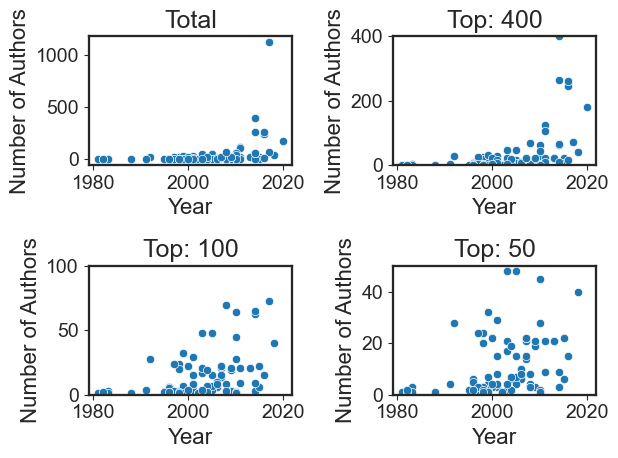

In [69]:
plt.subplot(2, 2, 1)

sns.scatterplot(y=muestra['Number of Authors'], x=muestra['Year'])
plt.title('Total')

plt.subplot(2, 2, 2)

sns.scatterplot(y=muestra['Number of Authors'], x=muestra['Year'])
plt.title('Top: 400')
plt.ylim(bottom=0, top=400)

plt.subplot(2, 2, 3)

sns.scatterplot(y=muestra['Number of Authors'], x=muestra['Year'])
plt.title('Top: 100')
plt.ylim(bottom=0, top=100)

plt.subplot(2, 2, 4)

sns.scatterplot(y=muestra['Number of Authors'], x=muestra['Year'])
plt.title('Top: 50')
plt.ylim(bottom=0, top=50)


plt.tight_layout()
plt.show()


Ya con este plot, se puede ver a diferentes escalas que el número de autores tiende a aumentar a lo largo del tiempo, en el período 1980-2020.

La siguiente gráfica comprende solamente un máximo de 100 autores, es decir, la que se encuentra abajo a la izquierda en el gráfico previo

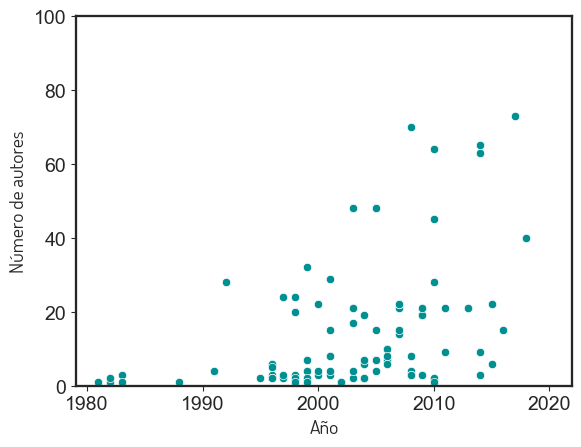

In [4]:
sns.scatterplot(y=muestra['Number of Authors'], x=muestra['Year'], color=BackColor1)

plt.xlabel('Año', fontdict=font)
plt.ylabel('Número de autores', fontdict=font)

plt.ylim(bottom=0, top=100)

plt.savefig('Figures/MuestraScatter.svg')
plt.savefig('Figures/MuestraScatter.pdf')
plt.show()

Tomemos ahora los datos de número de autores mayores a 20 en el mismo bin de 20 autores, para simplificar el análisis posterior.

In [90]:
muestra['Number of Authors (upto 20)'] = muestra['Number of Authors'].replace(np.arange(21, 1125, 1), 20)
muestra['Number of Authors (upto 100)'] = muestra['Number of Authors'].replace(np.arange(101, 1125, 1), 100)
#muestra['Number of Authors'] = muestra['Number of Authors'].replace(np.arange(11, 1125, 1), 20)

Con esto hacemos el historama de número de autores

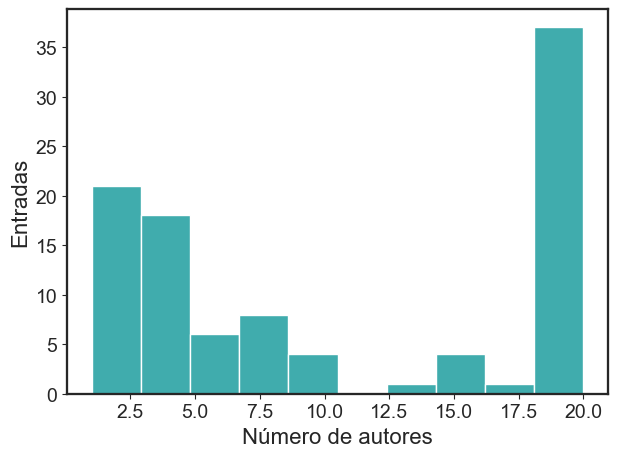

In [77]:
sns.histplot(data=muestra['Number of Authors (upto 20)'], bins=10, color=BackColor1)

plt.xlabel('Número de autores')
plt.ylabel('Entradas')

plt.tight_layout()
plt.savefig('Figures/MuestraAuthorsCount.svg')
plt.savefig('Figures/MuestraAuthorsCount.pdf')
plt.show()

Ahora, quisieramos ver el número de artículos de solamente 1 autor, en el mismo período de tiempo.

In [78]:
muestra['One Author'] = (muestra['Number of Authors (upto 20)'] == 1)
muestra['Two Authors'] = (muestra['Number of Authors (upto 20)'] == 2)
muestra['Less than 5 authors'] = (muestra['Number of Authors (upto 20)'] <=5) 
muestra['More than 10 authors'] = (muestra['Number of Authors (upto 20)'] >=10)
muestra['One Author'].value_counts()

False    91
True      9
Name: One Author, dtype: int64

In [18]:
muestra.loc[:,['Year', 'One Author']].value_counts()

Year  One Author
1996  False         7
2001  False         6
2014  False         6
1998  False         5
2006  False         5
2004  False         5
2003  False         5
2008  False         5
2007  False         5
2011  False         4
1999  False         4
2010  False         4
2009  False         4
2005  False         4
1997  False         3
2000  False         3
2016  False         3
2013  False         2
2015  False         2
2017  False         2
2002  True          2
2010  True          1
2018  False         1
1981  True          1
1982  False         1
1999  True          1
1998  True          1
1995  False         1
1992  False         1
1991  False         1
1988  True          1
1983  True          1
      False         1
1982  True          1
2020  False         1
dtype: int64

A continuación creamos varias series de acuerdo al número de autores por año, para 1, 2, menos de 5 y más de 10

In [79]:
SingleAuthorYears = muestra.loc[muestra['One Author'], 'Year']
TwoAuthorYears = muestra.loc[muestra['Two Authors'], 'Year']
LessThanFiveAuthorYears = muestra.loc[muestra['Less than 5 authors'], 'Year']
MoreThanTenAuthorYears = muestra.loc[muestra['More than 10 authors'], 'Year']
AllAuthorYears = muestra.loc[:, 'Year']

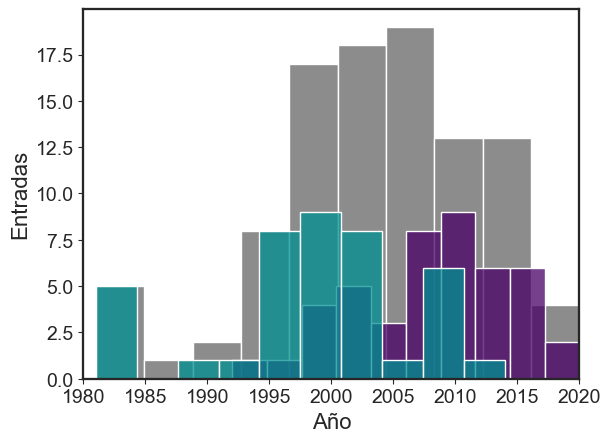

In [80]:
sns.histplot(data=AllAuthorYears, bins=10, color=BackGray, label="All")
sns.histplot(data=MoreThanTenAuthorYears, bins=10, color=BackColor2, label="$\geq 10")
sns.histplot(data=LessThanFiveAuthorYears, bins=10, color=BackColor1, label="$\leq 5")

plt.legend()
plt.xlabel('Año')
plt.ylabel('Entradas')

plt.xlim(xmin=1980, xmax=2020)
plt.savefig("Figures/MuestraHistogramsYears.svg")
plt.savefig("Figures/MuestraHistogramsYears.pdf")
plt.show()

Ahora tomemos algunos Boxplots para hacer estadísticas globales.

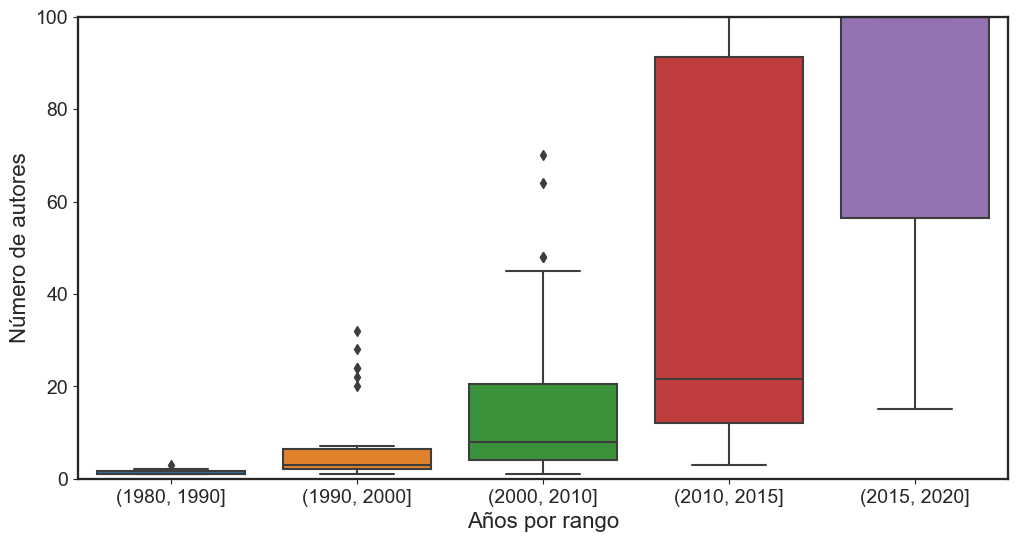

In [93]:
muestra["YrGroup"] = pd.cut(muestra['Year'], [1980, 1990, 2000, 2010, 2015, 2020])
plt.figure(figsize=(12, 6)) 
sns.boxplot(x="YrGroup", y="Number of Authors (upto 100)", data=muestra)

plt.xlabel('Años por rango')
plt.ylabel('Número de autores')
plt.ylim([0,100])
plt.show()


C:\Users\Nicolás\AppData\Local\Temp\ipykernel_27808\4272072390.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muestra_XX["YrGroup"] = pd.cut(muestra_XX['Year'], [1980, 1990, 2000])
C:\Users\Nicolás\AppData\Local\Temp\ipykernel_27808\4272072390.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muestra_XXI["YrGroup"] = pd.cut(muestra_XXI['Year'], [2000, 2005, 2010, 2015, 2020])


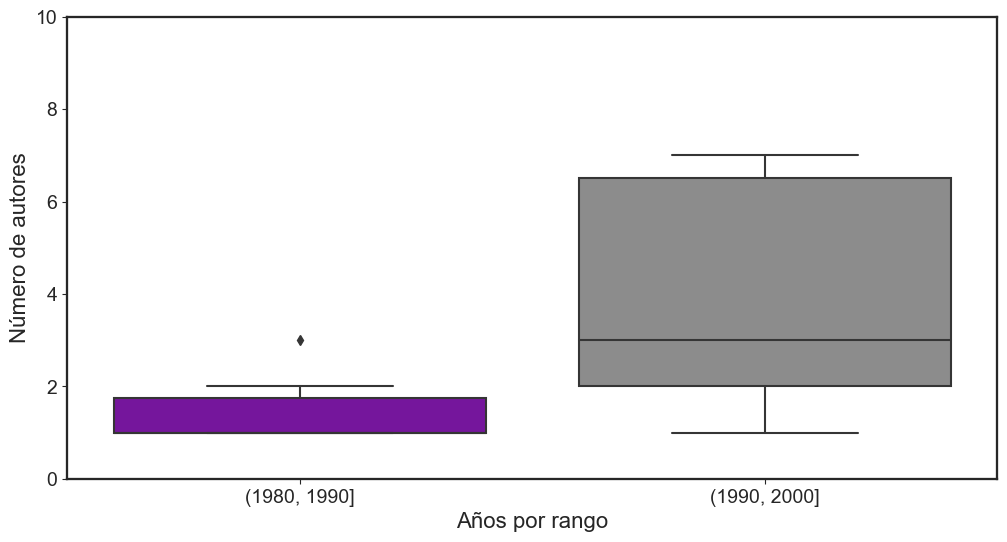

In [116]:
# Filtrar datos para incluir solo los 3 últimos rangos de años
muestra_XX = muestra[muestra['Year'].between(1980, 2000)]
muestra_XXI = muestra[muestra['Year'].between(2000, 2020)]

# Crear la columna 'YrGroup' basada en los rangos específicos
muestra_XX["YrGroup"] = pd.cut(muestra_XX['Year'], [1980, 1990, 2000])
muestra_XXI["YrGroup"] = pd.cut(muestra_XXI['Year'], [2000, 2005, 2010, 2015, 2020])

# Crear el gráfico con los datos filtrados del siglo XX
plt.figure(figsize=(12, 6)) 
sns.boxplot(x="YrGroup", y="Number of Authors", data=muestra_XX, palette=( MainColor2, MainGray))

plt.ylim([0, 10])
plt.xlabel('Años por rango')
plt.ylabel('Número de autores')
plt.show()

C:\Users\Nicolás\AppData\Local\Temp\ipykernel_27808\1446301065.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muestra_XX["YrGroup"] = pd.cut(muestra_XX['Year'], [1980, 1990, 2000])
C:\Users\Nicolás\AppData\Local\Temp\ipykernel_27808\1446301065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muestra_XXI["YrGroup"] = pd.cut(muestra_XXI['Year'], [2000, 2005, 2010, 2015, 2020])


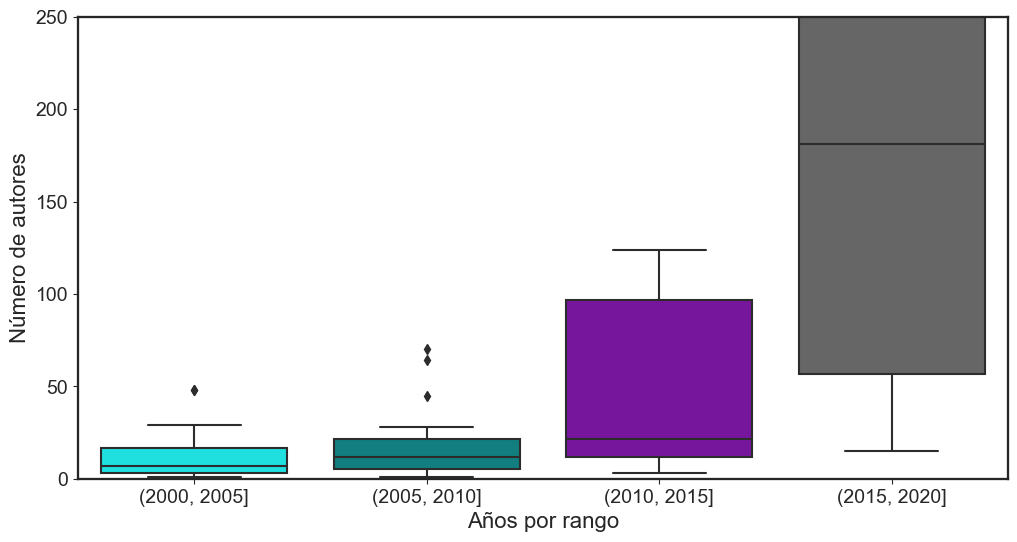

In [111]:
# Crear el gráfico con los datos filtrados del siglo XXI
plt.figure(figsize=(12, 6)) 
sns.boxplot(x="YrGroup", y="Number of Authors", data=muestra_XXI, palette=( MainColor1, BackColor1, MainColor2, BackGray))

plt.xlabel('Años por rango')
plt.ylabel('Número de autores')
plt.ylim([0, 250])
plt.show()


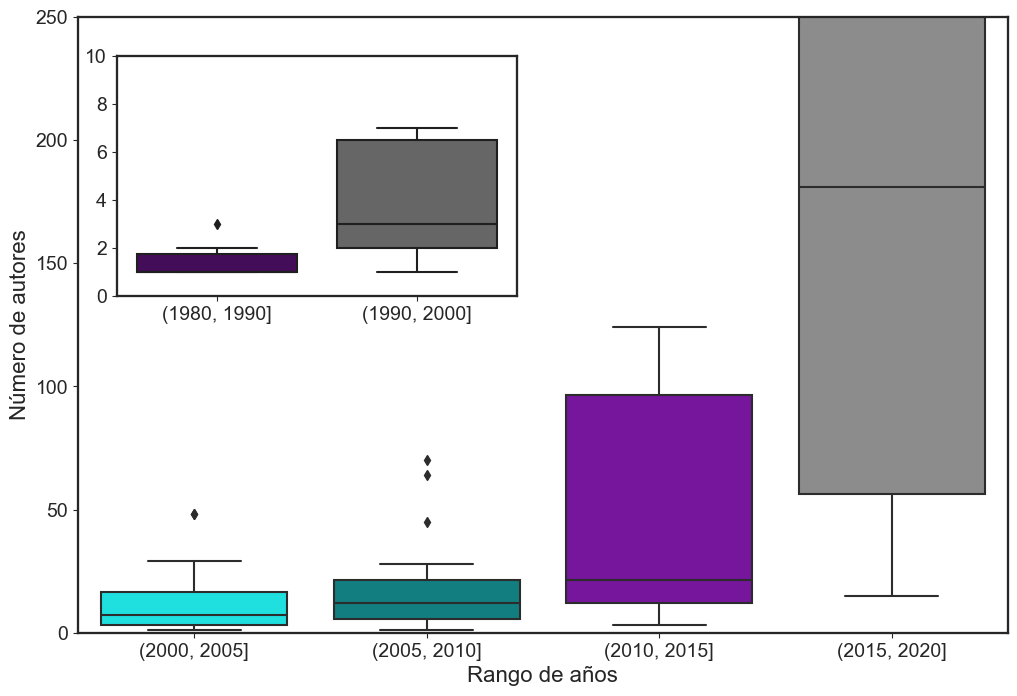

In [158]:
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.boxplot(x="YrGroup", y="Number of Authors", data=muestra_XXI, palette=( MainColor1, BackColor1, MainColor2, MainGray))


ax.set_xlabel('Rango de años')
ax.set_ylabel('Número de autores')
ax.set_ylim([0, 250])
# Create inset of width 1.3 inches and height 0.9 inches
# at the default upper right location
axins = inset_axes(ax, width=4, height=2.4, loc=(2), borderpad=2 )
sns.boxplot(x="YrGroup", y="Number of Authors", data=muestra_XX, palette=( BackColor2, BackGray))
axins.set_ylim([0, 10])
axins.tick_params(labelleft=True, labelbottom=True)
axins.set_ylabel(None)
axins.set_xlabel(None)

plt.savefig('Figures/MuestraBoxYearRange.svg')
plt.savefig('Figures/MuestraBoxYearRange.pdf')
plt.show()

### Citations